<a href="https://colab.research.google.com/github/Kim-Jeong-Ju/AI_Modeling/blob/main/Decision_Tree_for_Classification_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drive Connection and Packages Importation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Decision Tree, 의사 결정 트리**

*   Classification Tree, Regression Tree
*   Random Forest, Gradient Boost

[Ref.]
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/ensemble.html

## **Classification Tree**  
 Pre-pruning, max_depth=3 으로 설정해서 Overfitting 방지. Training set에서의 정확도는 떨어지지만, Test set에서의 성능은 향상. 
 그 외에도 [post pruning with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)를 활용 가능

### ***① DecisionTreeClassifier -- Scikit-Learn package***

In [ ]:
# Data Preparation and Split Training/Test data set
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/diabetes.csv')
diabetes_features = [x for i, x in enumerate(diabetes.columns) if i != 8]
print(diabetes_features)
print("Dimension of diabetes data: {}".format(diabetes.shape))
print()

train = diabetes[:650]    # training data = 1 ~ 650번째 data
test = diabetes[650:]     # test data = 651 ~ 768번째 data
x_train = np.asarray(train.drop('Outcome',1))
y_train = np.asarray(train['Outcome'])
x_test = np.asarray(test.drop('Outcome',1))
y_test = np.asarray(test['Outcome'])


# DecisionTreeClassifier by Scikit-Learn package
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=0)     # Gini by default, random_state = 0이면 tree의 random한 요소 없이 고정하는 역할
dt_clf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt_clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt_clf.score(x_test, y_test)))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Dimension of diabetes data: (768, 9)

Accuracy on training set: 0.783
Accuracy on test set: 0.763


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


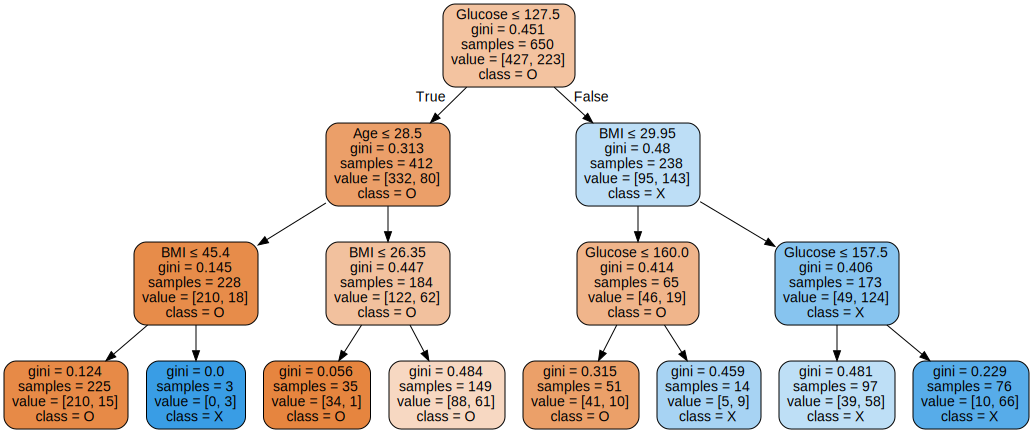

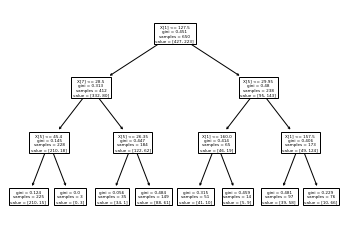

In [ ]:
# Visualize Classification Tree : Graphviz package 활용
tree.plot_tree(dt_clf)
[...]                 # tree를 graph의 형태로 plot

dot_data = tree.export_graphviz(dt_clf, out_file=None,
                     feature_names=diabetes_features,
                     class_names=['O','X'],       # 당뇨병인지 아닌지에 대한 column(Outcome)에 대한 표시
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

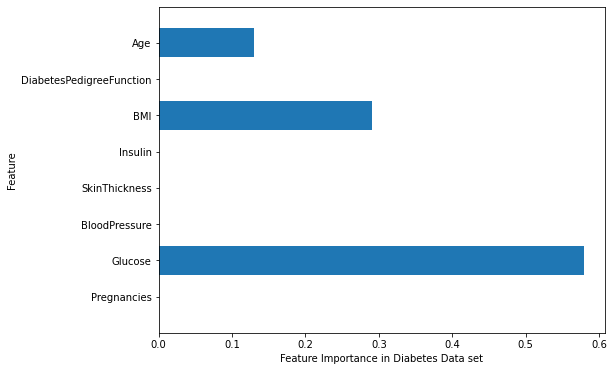

In [ ]:
# Check Feature Importance in Decision Tree(Variable Importance Measure) : 각각의 예측 변수가 Decision에 있어서 얼마나 중요한지 0과 1 사이의 값으로 표현(총합 1)
def plot_feature_importances_diabetes(model):
  plt.figure(figsize=(8, 6))
  n_features = 8
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), diabetes_features)
  plt.xlabel('Feature Importance in Diabetes Data set')
  plt.ylabel('Feature')
  plt.ylim(-1, n_features)

plot_feature_importances_diabetes(dt_clf)

### ***② RandomForestClassifier -- Scikit-Learn Ensemble pacakge***

Accuracy on training set: 0.792
Accuracy on test set: 0.771



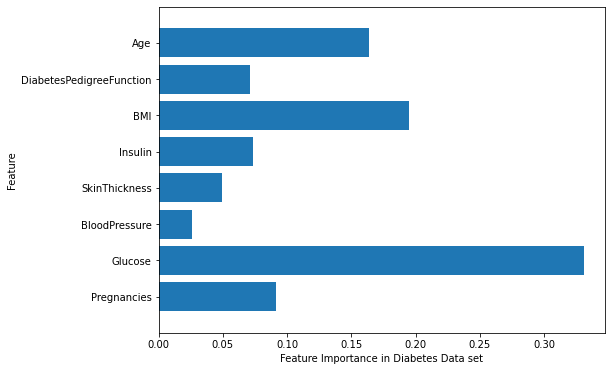

In [ ]:
# RandomForestClassifier by Scikit-Learn Ensemble package
rf_clf = RandomForestClassifier(n_estimators=100, max_features=2, max_depth=3, random_state=0)     # 100개의 sub-tree로 구성된 ensemble trees
rf_clf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf_clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_clf.score(x_test, y_test)))
print()

plot_feature_importances_diabetes(rf_clf)   # Random Forest의 Randomness로 인해 더 다양한 변수들을 고려

### ***③ GradientBoostingClassifier -- Scikit-Learn Ensemble pacakge***

Accuracy on training set: 0.855
Accuracy on test set: 0.754



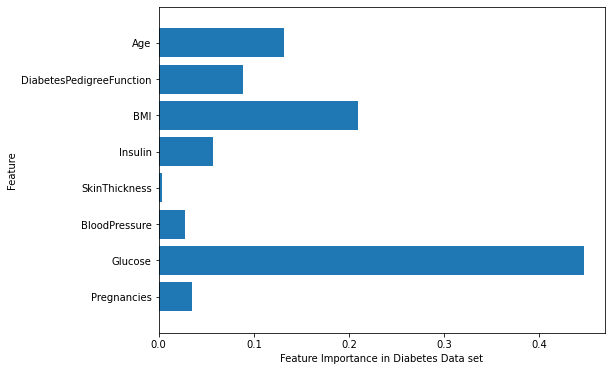

In [ ]:
# GradientBoostingClassifier by Scikit-Learn Ensemble package
gb_clf = GradientBoostingClassifier(max_depth=2, random_state=0)    # pre-pruning 대신 learning_rate=0.01 역시 비슷한 성능을 보임
gb_clf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb_clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb_clf.score(x_test, y_test)))
print()

plot_feature_importances_diabetes(gb_clf)   # Random Forest의 Randomness로 인해 더 다양한 변수들을 고려

## **Regression Tree**

### ***① DecisionTreeRegressor -- Scikit-Learn package***

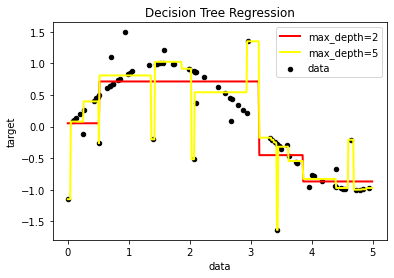

In [ ]:
# Create Random data set
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()                 # ravel() = 2차원을 1차원으로 변환
y[::5] += 3 * (0.5 - rng.rand(16))    # ::5 -> index를 5의 간격으로 띄워서 본다 & noise를 삽입한다

# Fit Regression model
dt_regr1 = DecisionTreeRegressor(max_depth=2)
dt_regr2 = DecisionTreeRegressor(max_depth=5)
dt_regr1.fit(X, y)
dt_regr2.fit(X, y)

# Prediction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test1 = dt_regr1.predict(X_test)
y_test2 = dt_regr2.predict(X_test)

# Plot the results : max depth를 줄여 noise data들에 대해 Overfitting되지 않도록 하는 것이 낫다
plt.figure()
plt.scatter(X, y, s=20, edgecolor='black', c='black', label='data')
plt.plot(X_test, y_test1, color='red', label='max_depth=2', linewidth=2)
plt.plot(X_test, y_test2, color='yellow', label='max_depth=5', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### ***② GradientBoostingRegressor with GridSearchCV -- Scikit-Learn package***

In [ ]:
## ① Hyper-parameter Optimization by PredefinedSplit and GridSearchCV
# Create Random data set
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(15000, 1), axis=0)
y = np.sin(X).ravel()                 # ravel() = 2차원을 1차원으로 변환
y[::5] += 3 * (0.5 - rng.rand(3000))    # ::5 -> index를 5의 간격으로 띄워서 본다 & noise를 삽입한다

x_train = X[:12000]
y_train = y[:12000]
x_test = X[12000:]
y_test = y[12000:]

# 전체 데이터 X에서 training data에 해당하는 index는 -1, test data에 해당하는 index는 0이 되도록,
# 여기서는 [-1, -1, ... , -1, 0, 0, ... , 0] 같은 형태의 1차원 배열 test fold와 predefined split을 정의
pre_defined_split = PredefinedSplit(test_fold=[-1]*len(x_train) + [0]*len(x_test))
param_grid = {
    'n_estimators' : [100, 200, 500],
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'learning_rate': [0.02, 0.03, 0.04],
    'loss': ['absolute_error', 'squared_error']
}


## ② Grid Search Model Definition and Selection
grid_search = GridSearchCV(
      estimator=ensemble.GradientBoostingRegressor(), 
      param_grid=param_grid,
      cv=pre_defined_split,
      n_jobs=-1,
      scoring='neg_mean_squared_error',
      verbose=2
)
grid_search.fit(X, y)
print(grid_search.best_params_)

Fitting 1 folds for each of 324 candidates, totalling 324 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


{'learning_rate': 0.04, 'loss': 'ls', 'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 500}


In [ ]:
## ③ Model Fitting and Test Error
best_params = {
    'n_estimators': 500,
    'max_depth': 5,
    'min_samples_leaf': 5,
    'learning_rate': 0.04,
    'loss': 'squared_error'
}

gb_regr = ensemble.GradientBoostingRegressor(**best_params, random_state=0)

gb_regr.fit(x_train, y_train)

mse = mean_squared_error(y_test, gb_regr.predict(x_test))
print("The mean squared error (MSE) on test set: {:.2f}".format(mse))
print("The initial error on test set: {:.2f}".format(mean_squared_error(y_test, x_test[:,0])))

mae = mean_absolute_error(y_test, gb_regr.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0])))

The mean squared error (MSE) on test set: 0.18
The initial error on test set: 29.73
The mean absolute error (MAE) on test set: 0.2726
The initial error on test set: 5.4270


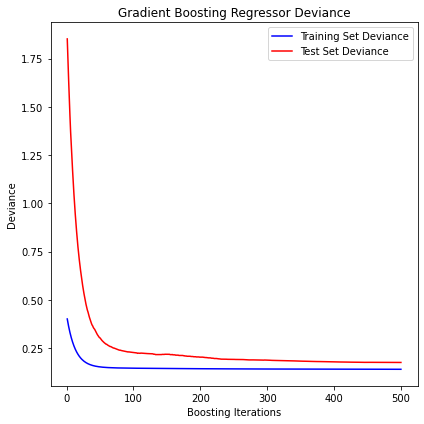

In [ ]:
## ④ Calculating Deviance of Training/Test data set
test_score = np.zeros((best_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gb_regr.staged_predict(x_test)):
    test_score[i] = gb_regr.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.title('Gradient Boosting Regressor Deviance')
plt.plot(np.arange(best_params['n_estimators']) + 1, gb_regr.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(best_params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()